In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
import pandas as pd
import numpy as np
import os 
import operator
import albumentations as A
import imageio
#import ipyplot
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

from PIL import Image

In [3]:
label_names= {
0: "Nucleoplasm 0",
1: "N. membrane 1",
2: "Nucleoli 2",
3: "N. fibrillar c. 3",
4: "N. speckles 4",
5: "N. bodies 5",
6: "ER 6",
7: "Golgi app. 7",
8: "Int. fil. 8",
9: "Actin fil. 9",
10: "Microtubules 10",
11: "Mitotic spindle 11",
12: "Centrosome 12",
13: "P. membrane 13",
14: "Mitochondria 14",
15: "Aggresome 15",
16: "Cytosol 16",
17: "Vesicles 17",
18: "Negative 18"
}

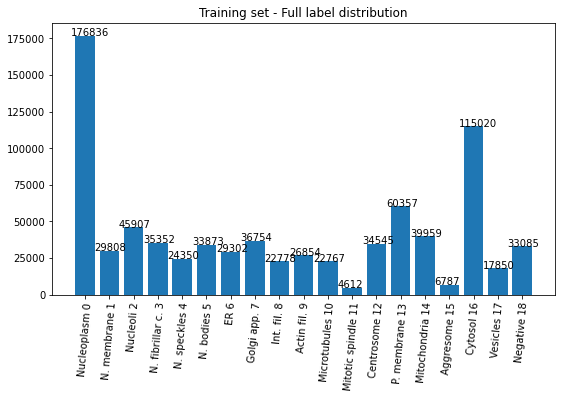

In [4]:
#read in the images and dataframe of segmented cells.
df_train_full_segmented = pd.read_csv("/media/beta/mitko-beps/heather/CSV/train_full.csv")

#check the counts
full_counts = {}
labels = [str(i) for i in range(19)]
for lbl in labels:
    count=0
    for i in df_train_full_segmented.index:
        if lbl in df_train_full_segmented['Label'][i].split('|'): 
            count += 1 * df_train_full_segmented['n_cells'][i]
    full_counts[lbl] = count
    
plt.figure(figsize=(9,5))
plt.bar(labels, full_counts.values())

for index, value in enumerate(full_counts.values()):
    plt.text(index-0.6, value, str(value), fontdict=dict(fontsize=10))

plt.title('Training set - Full label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented

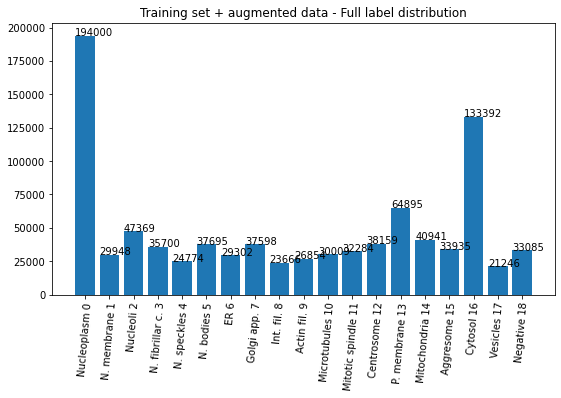

In [5]:
#read in the images and dataframe of segmented cells.
df_train_full_aug = pd.read_csv("/media/beta/mitko-beps/mandy/CSVinput/df_f_train.csv")

#check the counts
full_counts = {}
labels = [str(i) for i in range(19)]
for lbl in labels:
    count=0
    for i in df_train_full_aug.index:
        if lbl in df_train_full_aug['Label'][i].split('|'): 
            count += 1
    full_counts[lbl] = count
    
plt.figure(figsize=(9,5))
plt.bar(labels, full_counts.values())

for index, value in enumerate(full_counts.values()):
    plt.text(index-0.4, value, str(value), fontdict=dict(fontsize=10))

plt.title('Training set + augmented data - Full label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented

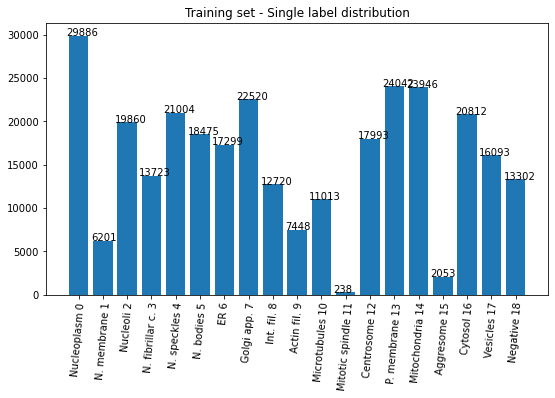

In [6]:
#read in the images and dataframe of segmented cells.
df_train_u_segmented = pd.read_csv("/media/beta/mitko-beps/heather/CSV/train_unique.csv")

labels = [i for i in range(19)]
unique_counts = {}
for lbl in labels:
    unique_counts[lbl] = sum(df_train_u_segmented.loc[df_train_u_segmented.Label == lbl, "n_cells"])

    
plt.figure(figsize=(9,5))
plt.bar(labels, unique_counts.values())

for index, value in enumerate(unique_counts.values()):
    plt.text(index-0.5, value, str(value), fontdict=dict(fontsize=10))

plt.title('Training set - Single label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented

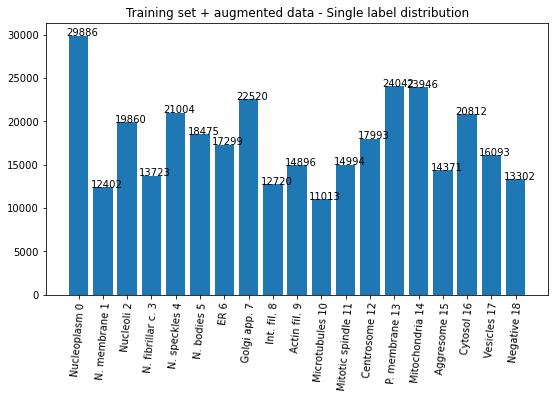

In [7]:
#read in the images and dataframe of segmented cells.
df_train_u_aug = pd.read_csv("/media/beta/mitko-beps/mandy/CSVinput/df_u_train.csv")

labels = [i for i in range(19)]
unique_counts = {}
for lbl in labels:
    unique_counts[lbl] = len(df_train_u_aug[df_train_u_aug.Label == lbl])

    
plt.figure(figsize=(9,5))
plt.bar(labels, unique_counts.values())

for index, value in enumerate(unique_counts.values()):
    plt.text(index-0.5, value, str(value), fontdict=dict(fontsize=10))

plt.title('Training set + augmented data - Single label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented

In [8]:
df_train_u_aug[:1].Label

0    1
Name: Label, dtype: int64

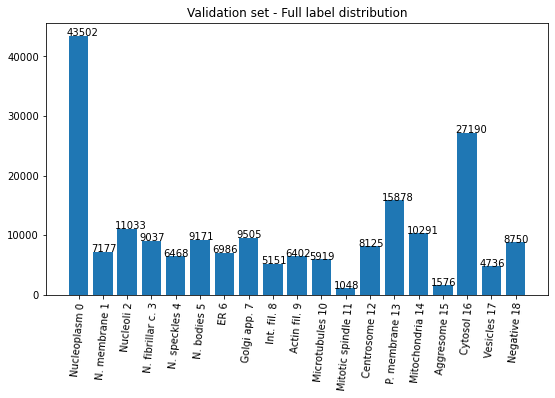

In [9]:
#read in the images and dataframe of segmented cells.
df_train_full_aug = pd.read_csv("/media/beta/mitko-beps/mandy/CSVinput/df_f_val.csv")

#check the counts
full_counts = {}
labels = [str(i) for i in range(19)]
for lbl in labels:
    count=0
    for i in df_train_full_aug.index:
        if lbl in df_train_full_aug['Label'][i].split('|'): 
            count += 1
    full_counts[lbl] = count
    
plt.figure(figsize=(9,5))
plt.bar(labels, full_counts.values())

for index, value in enumerate(full_counts.values()):
    plt.text(index-0.5, value, str(value), fontdict=dict(fontsize=10))

plt.title('Validation set - Full label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented

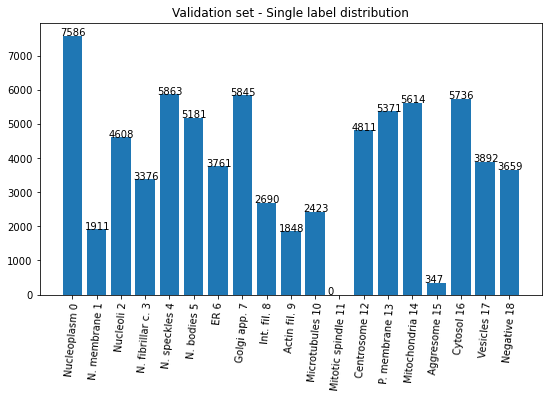

In [7]:
#read in the images and dataframe of segmented cells.
df_train_u_aug = pd.read_csv("/media/beta/mitko-beps/mandy/CSVinput/df_u_val.csv")

labels = [i for i in range(19)]
unique_counts = {}
for lbl in labels:
    unique_counts[lbl] = len(df_train_u_aug[df_train_u_aug.Label == lbl])

    
plt.figure(figsize=(9,5))
plt.bar(labels, unique_counts.values())

for index, value in enumerate(unique_counts.values()):
    plt.text(index-0.5, value, str(value), fontdict=dict(fontsize=10))

plt.title('Validation set - Single label distribution')
plt.xticks(np.arange(len(labels)), labels=label_names.values(), rotation=85)
plt.show()
#df_train_full_segmented